<a href="https://colab.research.google.com/github/benyuanben/-data_analytics_2-/blob/main/Python/Unit%203%20-%20Python%20Advanced/Assignments/Copy_of_Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [61]:
type(df)

pandas.core.frame.DataFrame

In [62]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [63]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [64]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [65]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [66]:
# Mean of all salaries
df.mean()

Unnamed: 0          199.000000
yrs.since.phd        22.314861
yrs.service          17.614610
salary           113706.458438
dtype: float64

In [67]:
# Median of all salaries
df.median()

Unnamed: 0          199.0
yrs.since.phd        21.0
yrs.service          16.0
salary           107300.0
dtype: float64

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [68]:
print(df.groupby(['sex','salary']).median())

               Unnamed: 0  yrs.since.phd  yrs.service
sex    salary                                        
Female 62884        124.0           25.0         22.0
       63100        238.0            7.0          6.0
       71065        317.0           12.0          9.0
       72500        131.0            2.5          0.5
       73300        232.0           26.0         24.0
...                   ...            ...          ...
Male   193000        78.0           26.0         19.0
       194800       272.0           42.0         18.0
       204000       250.0           29.0          7.0
       205500       365.0           43.0         43.0
       231545        44.0           38.0         38.0

[377 rows x 3 columns]


In [69]:
new_df = df[{'sex', 'salary'}]

In [70]:
new_df.head(20)

,salary,sex
0,139750,Male
1,173200,Male
2,79750,Male
3,115000,Male
4,141500,Male
5,97000,Male
6,175000,Male
7,147765,Male
8,119250,Male
9,129000,Female


Finding the Median salary for all males

In [71]:
male_only = new_df[(new_df['sex'] == 'Male')]

In [72]:
x = male_only['salary'].median()

In [73]:
male_only['salary'].median()

108043.0

Finding the Median salary for all females

In [74]:
female_only = new_df[(new_df['sex'] == 'Female')]

In [75]:
y = female_only['salary'].median()

In [76]:
female_only['salary'].median()

103750.0

Comparing the Mean salary of Males and Females

In [77]:
comparison = abs(x - y)

In [78]:
print(comparison)         ## on average male makes 4293 dollars more than female

4293.0


In [79]:
# The difference between mean salaries of male and female


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [80]:
servSal = df[['yrs.service', 'salary']]
print(servSal)

     yrs.service  salary
0             18  139750
1             16  173200
2              3   79750
3             39  115000
4             41  141500
..           ...     ...
392           30  103106
393           19  150564
394           25  101738
395           15   95329
396            4   81035

[397 rows x 2 columns]


In [81]:
have20 = servSal[servSal['yrs.service'] >= 20]
have20.count()

yrs.service    157
salary         157
dtype: int64

In [82]:
i = have20.mean()
print(i)

yrs.service        31.057325
salary         122520.656051
dtype: float64


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [83]:
havemore = servSal[servSal['yrs.service'] < 20]
havemore.count()

yrs.service    240
salary         240
dtype: int64

In [84]:
j = havemore.mean()
print(j)

yrs.service         8.820833
salary         107940.504167
dtype: float64


In [85]:
print(abs(i - j))

yrs.service       22.236492
salary         14580.151884
dtype: float64


People who have salary of greater than or equal to 200,000

In [86]:
sal_200k = servSal[servSal['salary'] >= 200000]
print(sal_200k)

     yrs.service  salary
43            38  231545
249            7  204000
364           43  205500


Your Findings here...


# Rename values, subset columns, etc

In [92]:
servSal.rename(columns={'yrs.service': 'Years of Service', 'salary': 'Salary'}) #rename column names

,Years of Service,Salary
0,18,139750
1,16,173200
2,3,79750
3,39,115000
4,41,141500
...,...,...
392,30,103106
393,19,150564
394,25,101738
395,15,95329


In [93]:
servSal.rename(index=lambda x: x + 1) #mass re-indexing

,yrs.service,salary
1,18,139750
2,16,173200
3,3,79750
4,39,115000
5,41,141500
...,...,...
393,30,103106
394,19,150564
395,25,101738
396,15,95329


# Create some simple visualizations showing some simple statistics

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import  style

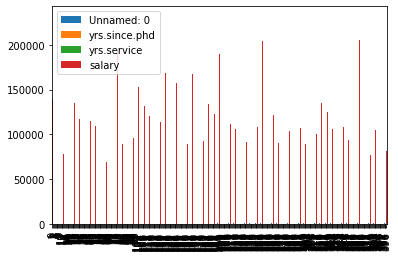

In [95]:
df.plot(kind= 'bar')

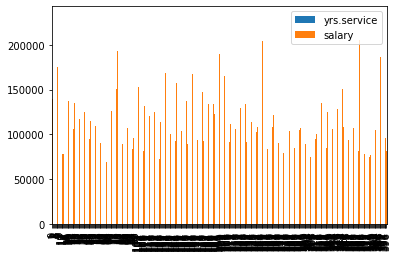

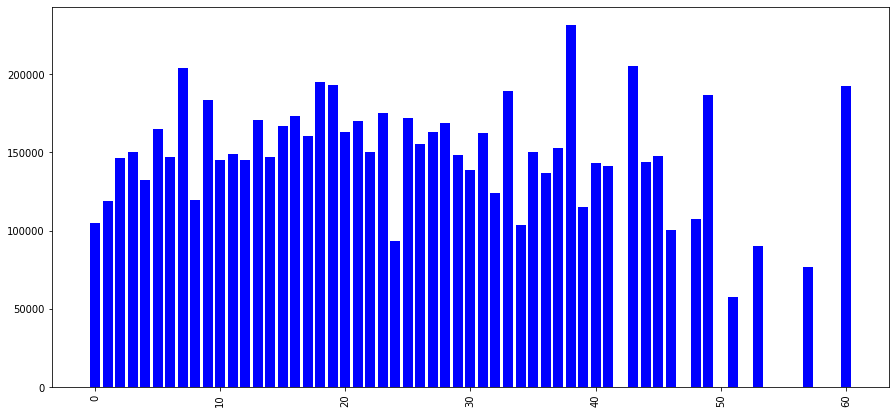

In [97]:
servSal.plot(kind= 'bar')
plt.figure(figsize=(15, 7))
plt.bar(x= df['yrs.service'], height= df['salary'], color= 'blue')
plt.xticks(rotation= 90)
plt.show()

Your observations from the visuals: 
Based on the graph, it really feels like the number of years worked has nothing to do with how much someone's salary is which is actually very counterintuitive. We would think that the veterans would have increased salaries.

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:
One thing that most people might have expected in this data is that the female average salary is slightly below the male salary.
Although, it is so I think if we look further into it we will probably be able to see that it is because the men also make up of the upper averages when it comes to working service years. Because they work longer, their averages are slightly skewed when compared to female averages.




I also discovered that the -

 
There were three people who made more 200k in salary and only one of them worked under 10 years. I would expect this individual to be quite the special fellow (either connections or genius).


